In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("INDIAvi.csv")

In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [6]:
summary_stats = df.describe()

In [7]:
print(summary_stats)

        category_id         views         likes      dislikes  comment_count
count  36791.000000  3.679100e+04  3.679100e+04  3.679100e+04   36791.000000
mean      21.552173  1.071490e+06  2.745069e+04  1.685363e+03    2714.022043
std        6.586716  3.207149e+06  9.783129e+04  1.619732e+04   14978.114328
min        1.000000  4.024000e+03  0.000000e+00  0.000000e+00       0.000000
25%       23.000000  1.256040e+05  8.790000e+02  1.090000e+02      83.000000
50%       24.000000  3.078360e+05  3.126000e+03  3.310000e+02     336.000000
75%       24.000000  8.066315e+05  1.409500e+04  1.032000e+03    1314.500000
max       43.000000  1.254322e+08  2.912710e+06  1.545017e+06  827755.000000


In [8]:
import numpy as np

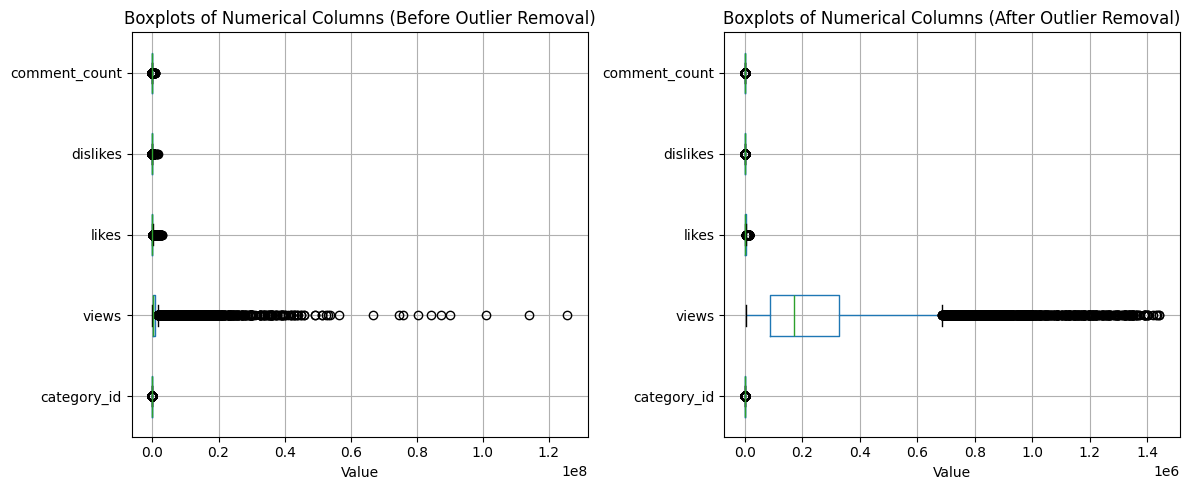

In [9]:
#  Define a function to remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

#  Create boxplots before removing outliers for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df[numeric_columns].boxplot(vert=False)
plt.title("Boxplots of Numerical Columns (Before Outlier Removal)")
plt.xlabel("Value")

#  Remove outliers from the DataFrame for each numeric column
for column in numeric_columns:
    df = remove_outliers_iqr(df, column)

#  Create boxplots after removing outliers for numeric columns
plt.subplot(1, 2, 2)
df[numeric_columns].boxplot(vert=False)
plt.title("Boxplots of Numerical Columns (After Outlier Removal)")
plt.xlabel("Value")

# Show the plots
plt.tight_layout()
plt.show()


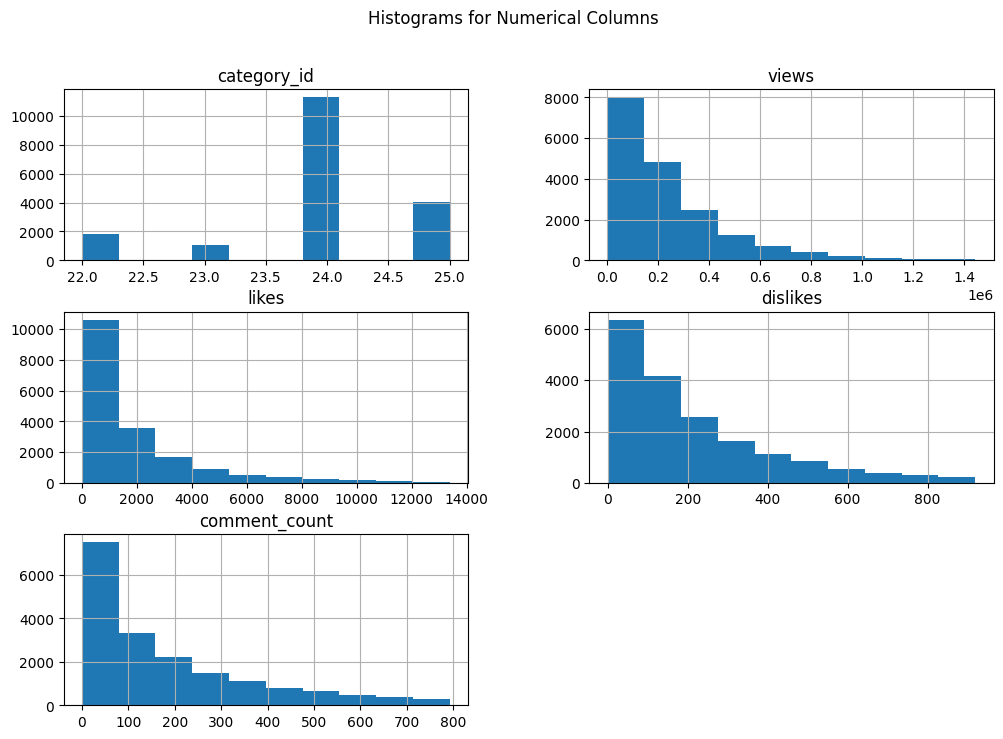

In [10]:
# Create histograms for all numerical columns
df.hist(figsize=(12, 8))
plt.suptitle("Histograms for Numerical Columns")
plt.show()


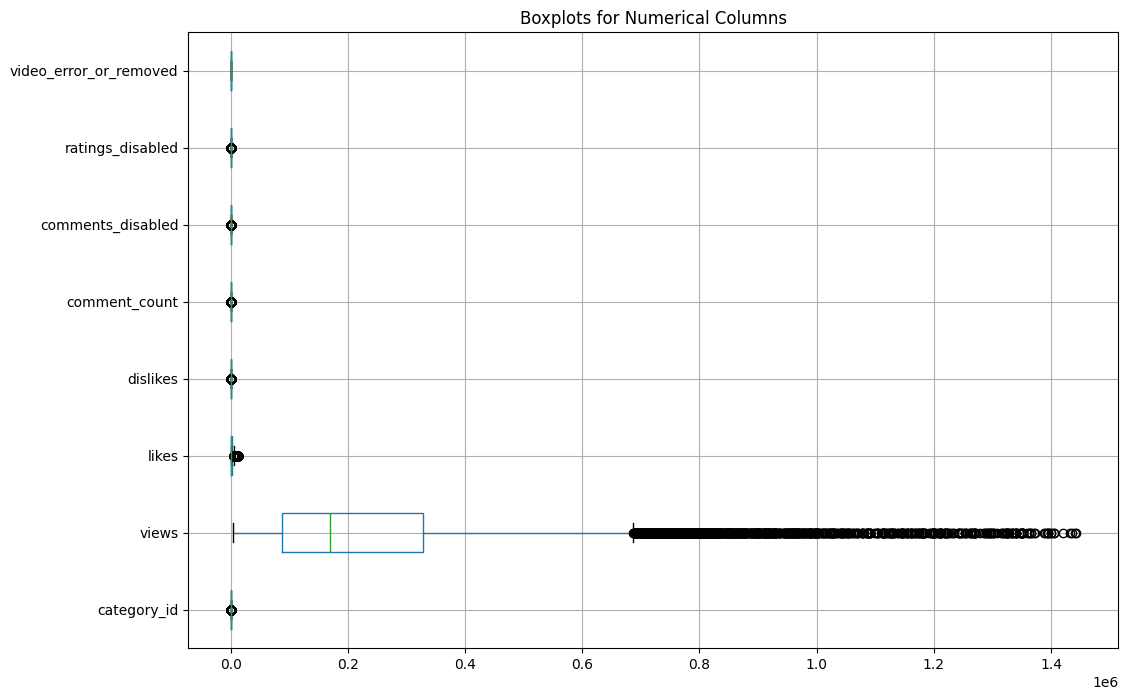

In [11]:
# Create boxplots for all numerical columns
df.boxplot(figsize=(12, 8), vert=False)
plt.title("Boxplots for Numerical Columns")
plt.show()


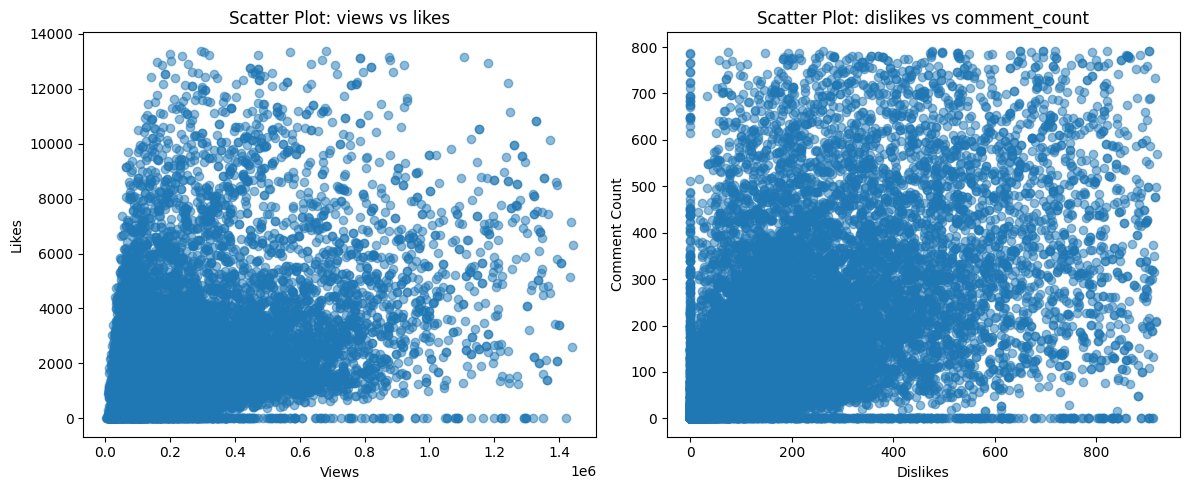

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify and visualize relationships between specific variables
# For example, you can create scatter plots for pairs of variables
plt.figure(figsize=(12, 5))

# Example 1: Scatter plot between "views" and "likes"
plt.subplot(1, 2, 1)
plt.scatter(df['views'], df['likes'], alpha=0.5)
plt.title("Scatter Plot: views vs likes")
plt.xlabel("Views")
plt.ylabel("Likes")

# Example 2: Scatter plot between "dislikes" and "comment_count"
plt.subplot(1, 2, 2)
plt.scatter(df['dislikes'], df['comment_count'], alpha=0.5)
plt.title("Scatter Plot: dislikes vs comment_count")
plt.xlabel("Dislikes")
plt.ylabel("Comment Count")

plt.tight_layout()
plt.show()


In [13]:
import scipy.stats as stats

# Load your dataset into a DataFrame
4

# Formulate your hypothesis
# Hypothesis: Videos with more likes have more views

# Calculate the correlation between 'likes' and 'views'
correlation, p_value = stats.pearsonr(df['likes'], df['views'])

# Check if the correlation is statistically significant
alpha = 0.05  # significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
    if correlation > 0:
        print("There is a positive correlation between likes and views.")
    else:
        print("There is a negative correlation between likes and views.")
else:
    print("The correlation is not statistically significant.")


The correlation is statistically significant.
There is a positive correlation between likes and views.
